<a href="https://colab.research.google.com/github/Yayahajdar/spam-ham/blob/main/spam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Import des différentes librairies nécessaires
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from wordcloud import WordCloud
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV



# Chargement des ressources NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /Users/john/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/john/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/john/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [49]:
# Lecture du fichier CSV ayant été généré à partir du jeu de données originel
df = pd.read_csv('data.csv',
         sep=',', header=None)
df = df.drop(0, axis=1)
df = df.drop(0, axis=0)
df

,1,2
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [50]:
# On renomme les noms des colonnes
df.rename(columns = {1:'sit',2:'correct'}, inplace = True)
df

,sit,correct
1,ham,Go until wrong point crazy Available only in b...
2,ham,of lar Joking if u on
3,spam,Free entry in 2 a wily come to win FA Cup fina...
4,ham,U dun say so early for U c already then say
5,ham,Nah I don't think he goes to us he lives aroun...
...,...,...
5568,spam,This is the and time we have tried 2 contact u...
5569,ham,Will i b going to esplanade for home
5570,ham,Pity was in mood for that sonny other suggestions
5571,ham,The guy did some bitching but I acted like id ...


In [51]:
# Exploration du nombre de valeurs dans la colonne "sit"
df['sit'].value_counts()

sit
ham     4825
spam     747
Name: count, dtype: int64

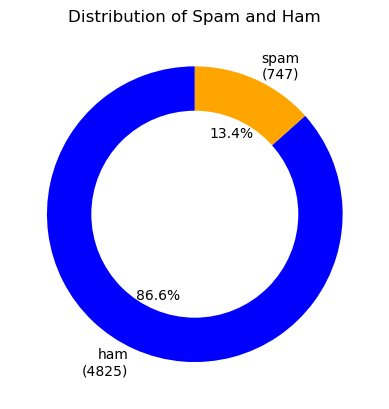

In [52]:
# Dessine le graphique
labels = ['ham', 'spam']
counts = [4825, 747]

# Calcule le pourcentage
percentages = [count / sum(counts) * 100 for count in counts]

# Création d'une liste de label associé à un compte et un pourcentage
label_values = [f'{label}\n({count})' for label, count in zip(labels, counts)]
# Choix du format du graphique
plt.pie(counts, labels=label_values, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=90)

# Trace un cercle au milieu du graphique afin de créer un donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Distribution of Spam and Ham")

plt.show()

In [53]:
# Séparation des deux classes
df_ham = df[df.sit=='ham']
df_spam = df[df.sit=='spam']

# Transformation en liste
ham_list=df_ham['correct'].tolist()
spam_list= df_spam['correct'].tolist()

# Séparation des données en jeu de données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(df['correct'],  df['sit'], test_size=0.2, random_state=42)

In [54]:
# Prétraitement des données
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [55]:
# Fonction de correction des mots et des phrases
def preprocess(text):
    words = word_tokenize(text)
    words = [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)
# Correction des mots et des phrases
X_train = [preprocess(str(text)) for text in X_train]
X_test = [preprocess(str(text)) for text in X_test]

In [56]:
#convert the list into a string
fil_spam = ("").join(spam_list)
fil_spam = fil_spam.lower()
#convert the list into a string
fil_ham = "".join(map(str, ham_list))
fil_ham = fil_ham.lower()

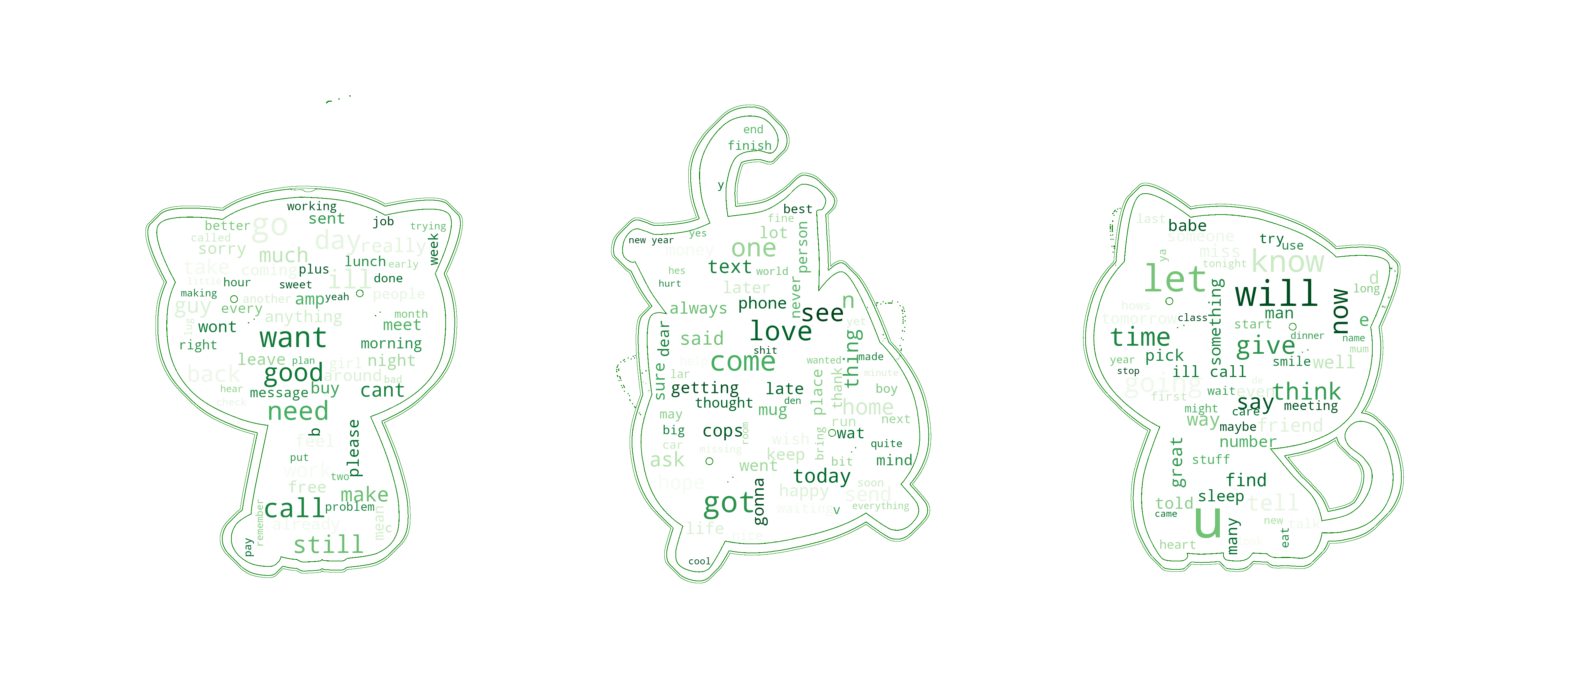

In [57]:
# Création d'un filtre prenant en paramètre une image du répertoire du projet
comment_mask = np.array(Image.open("image/cat.png"))
# Génère un nuage de mots pour les "HAM"
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", contour_color= 'green',contour_width= 1,   colormap="Greens").generate(fil_ham)
 
# Agencement du nuage de mots sur l'image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

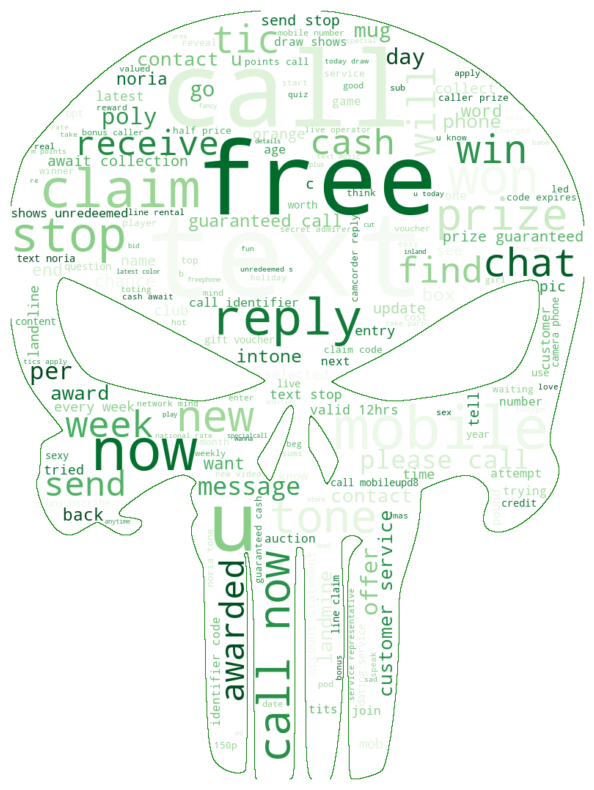

In [58]:
# Création d'un filtre prenant en paramètre une image du répertoire du projet
comment_mask = np.array(Image.open("image/bat.png"))
# Génère un nuage de mots pour les "SPAM"
wordcloud = WordCloud(max_font_size = 160, margin=0, mask = comment_mask, background_color = "white", contour_color= 'green',contour_width= 1     ,   colormap="Greens").generate(fil_spam)
 
# Agencement du nuage de mots sur l'image

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.margins(x=0, y=0)

plt.show()

In [59]:
# Première alternative de vectorisation : CountVectorizer()
count_vectorizer = CountVectorizer()
X_train_count_vectorized = count_vectorizer.fit_transform(X_train)
X_test_count_vectorized = count_vectorizer.transform(X_test)

In [60]:
# Seconde alternative de vectorisation : TfidVectorizer()
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf_vectorized = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf_vectorized = tfidf_vectorizer.transform(X_test)

In [61]:
# Choix du modèle ComplementNB, puis ajustement du modèle aux données d'entraînement

classifier_count = ComplementNB()
classifier_count.fit(X_train_count_vectorized, y_train)

ComplementNB()

In [62]:

# Prédiction sur les données test vectorisés par CountVectorize()
predictions_count = classifier_count.predict(X_test_count_vectorized)

In [63]:
 
# Evaluation de la précision (accuracy) du modèle ComplementNB
accuracy_count = accuracy_score(y_test, predictions_count)
print("Accuracy (Count Vectorized):", accuracy_count)

Accuracy (Count Vectorized): 0.9479820627802691


In [64]:
# Alternative au modèle ComplementNB, MultinomialNB
model = MultinomialNB(force_alpha = True)
model.fit(X_train_count_vectorized, y_train)
predictions_model = model.predict(X_test_count_vectorized) 
# Evaluation de la précision (accuracy) du modèle MultinomialNB
accuracy_model = accuracy_score(y_test, predictions_model)
print("Accuracy (model Vectorized):", accuracy_model)

Accuracy (model Vectorized): 0.9811659192825112


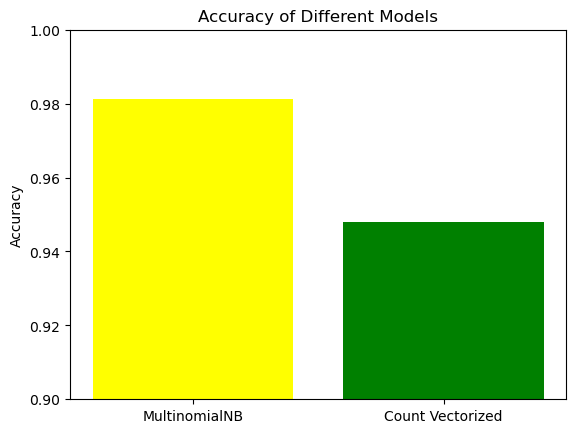

In [65]:
# Tracement d'un graphique afin de visualiser les performances des deux modèles

# Noms des modèles comparés
models = ['MultinomialNB', 'Count Vectorized']

# Précisions(accuracy) des deux modèles
accuracies = [accuracy_model, accuracy_count]

# Paramétrage du graphique puis tracé.
plt.bar(models, accuracies, color=['yellow', 'green'])
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0.9, 1.0)
plt.show()

In [66]:
# Entraînement du modèle Multinomial Naive Bayes classifier sur des données vectorisées par TF-IDF Vectorizer
classifier_MU = MultinomialNB()
classifier_MU.fit(X_train_tfidf_vectorized, y_train)

# Prédiction sur le jeu de données de test
predictions_MU = classifier_MU.predict(X_test_tfidf_vectorized)


# Evaluation de la précision(accuracy) du modèle
accuracy_MU = accuracy_score(y_test, predictions_MU)
print("Accuracy (TF-IDF Vectorized):", accuracy_MU)

Accuracy (TF-IDF Vectorized): 0.9641255605381166


In [67]:
# Entraînement du modèle  ComplementNB Naive Bayes sur des données vectorisées par TF-IDF Vectorizer
classifier_tfidf = ComplementNB()
classifier_tfidf.fit(X_train_tfidf_vectorized, y_train)

# Prédiction sur le jeu de données de test
predictions_tfidf = classifier_tfidf.predict(X_test_tfidf_vectorized)
# Evaluation de la précision(accuracy) du modèle
accuracy_tfidf = accuracy_score(y_test, predictions_tfidf)
print("Accuracy (TF-IDF Vectorized):", accuracy_tfidf)

Accuracy (TF-IDF Vectorized): 0.9479820627802691


In [68]:

# Lecture d'un nouveau message inscrit par l'utilisateur
new_email =input("Enter the email or SmS: ")
# Prétraitement sur le nouveau message
preprocessed_email = preprocess(new_email)

vectorized_email = tfidf_vectorizer.transform([preprocessed_email])

prediction = classifier_count.predict(vectorized_email)

# Affichage du résultat de la prédiction
print("Predicted Class:", prediction[0])

Predicted Class: ham


In [69]:
# Compte de la prédiction du modèle ComplementNB
y_pred = classifier_count.predict(X_test_tfidf_vectorized)

In [70]:
# Test comparatif nous renvoyant un booléen nécessaire pour notre prochaine matrice de confusion
y_test == y_pred


3246     True
945      True
1045     True
2485     True
813     False
        ...  
4265     True
2440     True
5557     True
4206     True
4294    False
Name: sit, Length: 1115, dtype: bool

In [71]:

# Moyenne des prédictions réussies = précision
np.mean(y_test == y_pred)

0.9417040358744395

In [72]:
# Précision du modèle
accuracy_score(y_test, y_pred)

0.9417040358744395

In [73]:

# Matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[910,  56],
       [  9, 140]])

In [74]:
# Transformation des labels en numériques
lb_encod = LabelEncoder()
y = lb_encod.fit_transform(df['correct'])
y[:5]
     

array([ 834, 4738,  774, 3177, 2164])

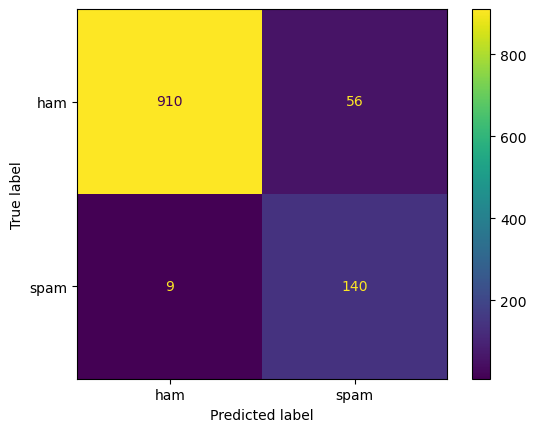

In [75]:

# Création d'une matrice de confusion générée par MatplotLib
cm_plot = ConfusionMatrixDisplay(confusion_matrix,
                                display_labels=classifier_count.classes_)

cm_plot.plot()

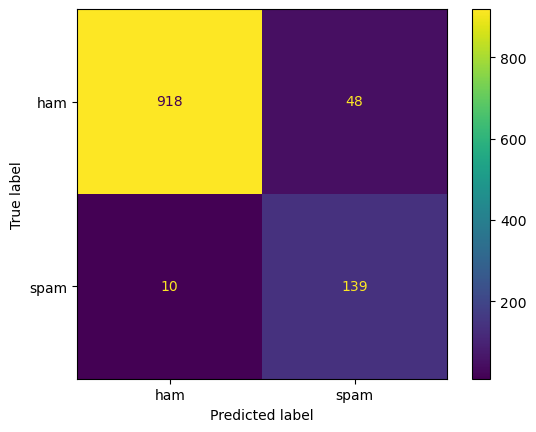

In [76]:

# Equivalent 
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = classifier_count,
                                      X = X_test_count_vectorized,
                                      y = y_test,
                                      display_labels=classifier_count.classes_)

In [77]:

# Somme des "True positives" (y_test = 1, y_pred = 1)
TP = sum((y_test == 'spam') & (y_pred == 'spam'))
print (TP)

140


In [78]:
# Somme des "True negatives" (y_test = 0, y_pred = 0)
TN = sum((y_test == 'ham') & (y_pred == 'ham'))
TN

910

In [79]:

# Somme des "False negatives" (y_test = 1, y_pred = 0)
FN = sum((y_test == 'spam') & (y_pred == 'ham'))
FN
     

9

In [80]:

# Somme des "False positives" (y_test = 0, y_pred = 1)
FP = sum((y_test == 'ham') & (y_pred == 'spam'))
FP
     

56

In [81]:
# Calcule de la justesse(precision)
precision = TP / (TP + FP)
precision

0.7142857142857143

In [82]:
# Calcule du "recall"
recall = TP / (TP + FN)
recall

0.9395973154362416

In [83]:
# Changement de vectorisation, stockage des jeu de données de test vectorisés par TF-IDF
y_pred = classifier_tfidf.predict(X_test_tfidf_vectorized)

In [84]:

# Transformation des labels en numériques pour y_test et y_pred ('ham' and 'spam')
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)
y_pred_numeric = label_encoder.fit_transform(y_pred)


In [85]:
# Calcule des valeurs "False Positive", "True Positive" et du seuil.
fpr, tpr, thresholds = metrics.roc_curve(y_true_binary, y_pred_numeric )

print("False positive rate:", fpr)
print("True positive rate:", tpr)
print("Thresholds:", thresholds)


False positive rate: [0.         0.04761905 1.        ]
True positive rate: [0.         0.91946309 1.        ]
Thresholds: [inf  1.  0.]


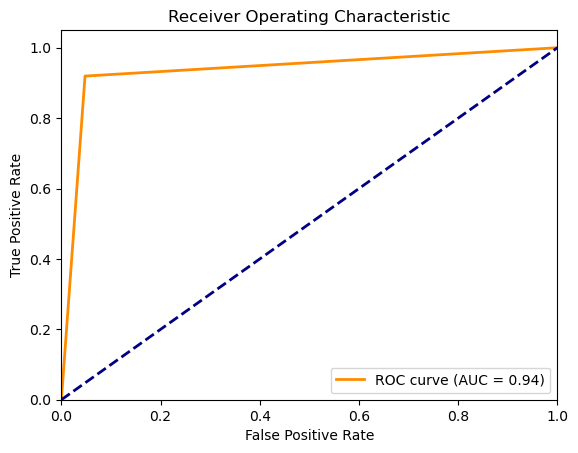

In [97]:
from sklearn.metrics import roc_curve, auc
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [87]:
# Calcule du F1 score dans le cas où le déséquilibre des données viendrait à fausser nos résultats
from sklearn.metrics import f1_score
f1_scores = f1_score(y_true_binary, y_pred_numeric , average='macro')

In [88]:
# Calcule de notre score de Rappel
from sklearn.metrics import recall_score
recall_scores = recall_score(y_true_binary, y_pred_numeric, average='macro')

In [89]:
# Création du Pipeline prenant en étape la vectorization et la création du modèle ComplementNB
pipe = Pipeline([
    ('tfidfvectorizer', TfidfVectorizer()),
    ('ComplementNB', ComplementNB())
])

param_grid = {
    'ComplementNB__alpha': [0.1, 0.5, 1.0]
}


In [90]:
# Ajustement du pipeline à nos données d'entraînement
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('ComplementNB', ComplementNB())])

In [91]:
# Paramétrage de la grille de recherche
grid = GridSearchCV(pipe,param_grid,scoring='accuracy' , cv=5, n_jobs=-1 )

In [92]:
# Ajustement de la grille de recherche à nos données d'entraînement
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                                       ('ComplementNB', ComplementNB())]),
             n_jobs=-1, param_grid={'ComplementNB__alpha': [0.1, 0.5, 1.0]},
             scoring='accuracy')

In [93]:

# Meilleure score après cross-validation
print("CV score - Accuracy:", grid.best_score_)

CV score - Accuracy: 0.9490686637173932


In [94]:


# Evaluation des performances du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Test score - Accuracy:", accuracy)


Test score - Accuracy: 0.9479820627802691
